### Bayesian A/B Testing

## Introduction

**Include your code and answers in** `bayesian_testing.py`.

Front-end web developers are interested in which design of their website yields more sales or some other metric of interest. They will route some fraction of visitors to site A, and the other fraction to site B, and record if the visit yielded a sale or not.

Forget everything you know about statistical testing for now. Let's start from scratch and answer our customer's most important question directly: what is the probability that the CTR for site A is larger than CTR for site B given the data from the experiment (i.e. a sequence of 0s and 1s in the case of click-through-rate)?

We'll call **pA** the true CTR for site A and **pB** the true CTR for site B. These are the values we are trying to figure out empirically.

## Basic

### Part 1: Understanding CTR from one site

For this exercise, we assume you've imported the following modules:

```python
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
```

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

1. You'll find some click-through data in the `data` folder. There are two files, one for each version of the site.
    * the 0 refers to a visit without a conversion
    * the 1 refers to a visit with a conversion.

    Read in the data into python and store it in two arrays, one for each version of the site.

In [9]:
site_A = np.loadtxt('data/siteA.txt')

In [10]:
site_B = np.loadtxt('data/siteB.txt')

In [15]:
site_A.shape

(800,)

2. We'll start by dealing with only the Site A data. We'd like to visualize our understanding of the CTR as the data streams in. Let's start with the uniform prior. So before we get any data, we will say that every probability of 0 to 1 is equally likely. We would like to plot our distribution.

    * To plot a continuous distribution, we need to make it discrete (since computers work that way). So we pick a large number of points to be our sample. In this case, take 100 points from 0 to 1 like this:

        ```python
        x = np.arange(0, 1.01, 0.01)
        ```

    * Then use the `pdf` function for your distribution (which `scipy.stats` nicely has for us). In this case, since we're looking at the uniform distribution, we do the following.

        ```python
        y = stats.uniform(0, 1).pdf(x)
        ```

    * Now we can use `ax.plot` to plot the data. You can use this function to plot the distribution with it shaded in:

        ```python
        def plot_with_fill(ax, x, y, label):
            lines = ax.plot(x, y, label=label, lw=2)
            ax.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
        ```

        Give it the label "Prior".

    * Do `plt.show()` to see the plot.

    * Did your "Prior" label show up? You probably also need to add a `ax.legend()` call (before `plt.show`).

In [16]:
x = np.linspace(0,1, num=100)
x.shape

(100,)

In [19]:
y = stats.uniform(0, 1).pdf(x)

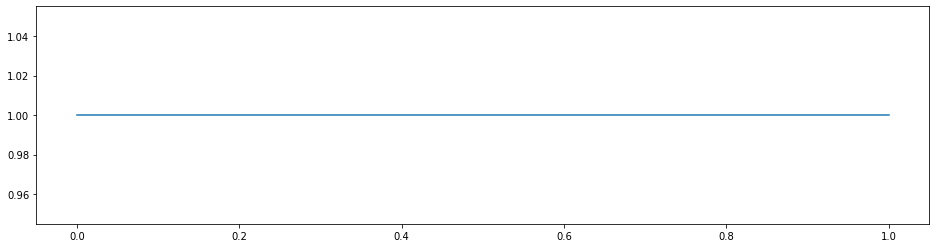

In [20]:
fig, ax = plt.subplots(1, figsize=(16,4))
ax.plot(x,y)

In [21]:
def plot_with_fill(ax, x, y, label):
      lines = ax.plot(x, y, label=label, lw=2)
      ax.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())

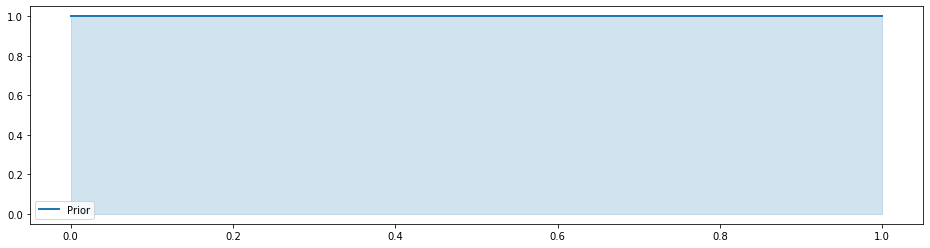

In [26]:
fig, ax = plt.subplots(1, figsize=(16,4))
plot_with_fill(ax, x, y, label='Prior')
ax.legend()

3. We will be using a *beta* distribution to represent the distribution of *pA* (the CTR for site A). First, modify the above to use the beta distribution instead of the uniform distribution to verify to yourself that with parameters `alpha=1` and `beta=1`, the beta distribution *is* the uniform distribution.

In [28]:
y_beta = stats.beta(1, 1).pdf(x)

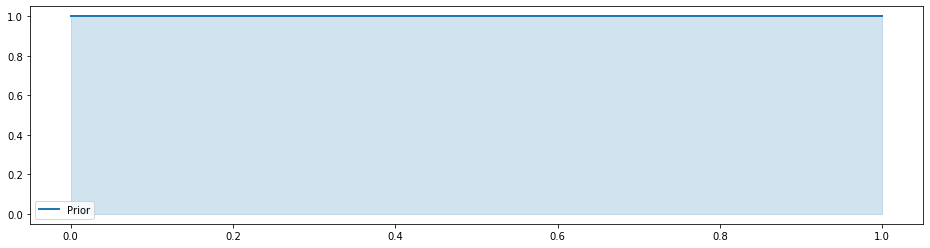

In [29]:
fig, ax = plt.subplots(1, figsize=(16,4))
plot_with_fill(ax, x, y_beta, label='Prior')
ax.legend()

4. Consider the data of siteA for the first 50 views. Draw a plot of the *posterior* after gathering this data. You should add the `alpha` parameter the number of conversions you've gotten. To the `beta` parameter, add the number of non-conversions you've gotten.

In [34]:
#Number of conversion - 1 & number of non-conversions - 0
k = site_A[:51].sum()

In [35]:
alpha_1 = k + 1
beta_1 = len(site_A[:51])- k + 1

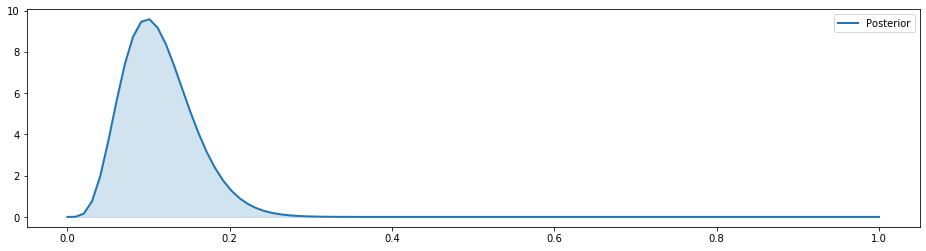

In [37]:
y_beta = stats.beta(alpha_1, beta_1).pdf(x)
fig, ax = plt.subplots(1, figsize=(16,4))
plot_with_fill(ax, x, y_beta, label='Posterior')
ax.legend()

5. Overlay this new plot on top of the previous one. You should get something that looks like this:

    ![Prior and Posterior](images/prior_posterior.png)

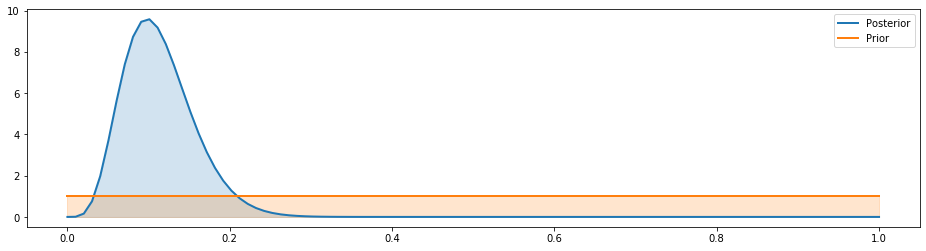

In [38]:
y_beta = stats.beta(alpha_1, beta_1).pdf(x)
y_uniform = stats.beta(1,1).pdf(x)
fig, ax = plt.subplots(1, figsize=(16,4))
plot_with_fill(ax, x, y_beta, label='Posterior')
plot_with_fill(ax, x, y_uniform, label='Prior')
ax.legend()

6. After 50 views, we're starting to hone in on our prediction of *pA*. Overlay on the same graph the posterior after 50 views, 100 views, 200 views, 400 views and finally all 800 views.

    You should see as time progresses that we get more certain of the true value of *pA*.

In [ ]:
views = [50, 100, 200, 400, 800]
ks = [np.sum(site_A[0:v]) for v in views]
alphas = [k + 1 for k in ks]
betas = [len(site_A[0:v]) - k +1 for v, k in zip(views, ks)]
#ys = [stats.beta(a, b).pdf(x) for a,b in zip(alphas, betas)]

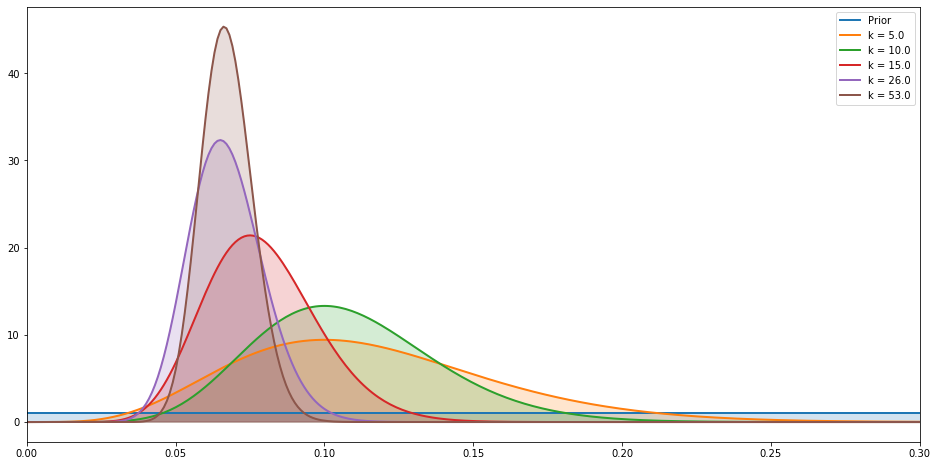

In [64]:
x = np.linspace(0, 1., num=1000)
y_uniform = stats.beta(1,1).pdf(x)
ys = [stats.beta(a, b).pdf(x) for a,b in zip(alphas, betas)]
fig, ax = plt.subplots(1, figsize=(16,8))
plot_with_fill(ax, x, y_uniform, label='Prior')
for i in range(len(ks)):
    plot_with_fill(ax, x, ys[i], label=f'k = {ks[i]}')
ax.set_xlim(0,0.3)
ax.legend()

7. Now we should understand how we're using the beta distribution to represent the distribution of the possible values of *pA*. Make a graph that has the final distributions for both *pA* and *pB* after all 800 views.

    You might want to use `ax.set_xlim` to change the limits of the x-axis so you can see the interesting part more clearly.

    You can see that the majority of the time site B is better than site A, but there is a chance that site A is better.

In [66]:
k_B = site_B[:800].sum()
alpha_B = k_B + 1
beta_B = len(site_B[:800])- k_B + 1

In [67]:
k_A = site_A[:800].sum()
alpha_A = k_A + 1
beta_A = len(site_A[:800])- k_A + 1

In [68]:
y_A = stats.beta(alpha_A,beta_A).pdf(x)
y_B = stats.beta(alpha_B,beta_B).pdf(x)

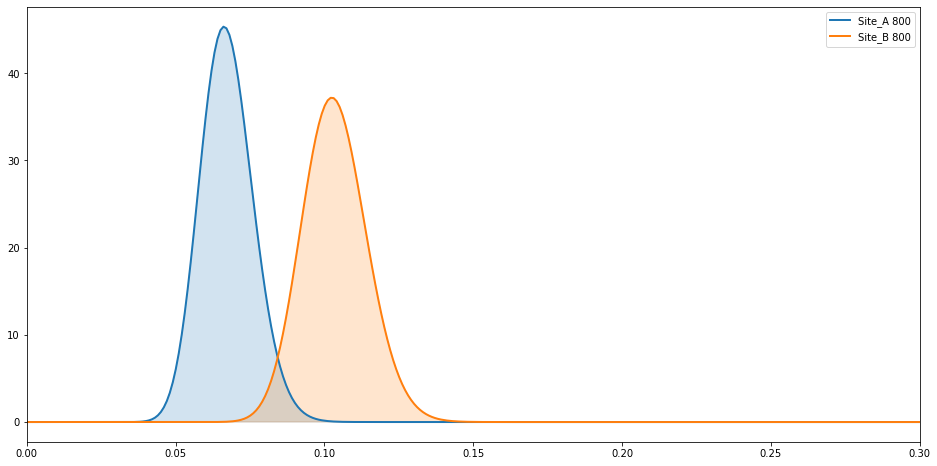

In [70]:
fig, ax = plt.subplots(1, figsize=(16,8))
plot_with_fill(ax, x, y_A, label='Site_A 800')
plot_with_fill(ax, x, y_B, label='Site_B 800')
ax.set_xlim(0,0.3)
ax.legend()

## Advanced

### Part 2: Comparing two CTRs

1. We now want to determine, given these distributions, what is the probability that site B is better than site A.

    We do this with a simulation. Draw 10,000 points from site A's beta distribution and 10,000 points from site B's distribution. Use either `stats.beta().rvs()` or `np.random.beta()` for this.

    You should get two arrays that look something like this:

    ```python
    array([ 0.08609807,  0.05759121,  0.0581405 , ...,  0.07907663,
            0.09122627,  0.0606501 ])
    ```

    This is simulating 10,000 times of drawing from our distributions. Count the number of times that what we drew from site B's distribution is larger than what we drew from site A's distribution. Divide by 10,000 to get the percent likelihood that site B is better than site A.

In [71]:
A = stats.beta(alpha_A,beta_A).rvs(10000)
B = stats.beta(alpha_B,beta_B).rvs(10000)

In [77]:
CountB = 0
for e, i in zip(A, B):
    if i > e:
        CountB += 1
CountB

9961

In [78]:
Percent_likelihood_B = CountB/10000
Percent_likelihood_B

0.9961

2. An X% [credible interval](https://en.wikipedia.org/wiki/Credible_interval) in a posterior distribution is analogous to a frequentist analysis's confidence intervals. One method of determining a credible interval is the highest density interval (HDI), which is the most dense interval of a posterior distribution containing X% of its mass. Another method is the equal-tailed interval, which is the interval containing X% of the posterior distribution's mass where the probability of being below the interval is as likely as being above it.

    Determine the 95% equal-tailed interval for site A's beta distribution using the simulations you just performed. (Hint: `scipy.stats` has a percentile function called `ppf`.)

In [80]:
A_Posterior = stats.beta(alpha_A,beta_A)

In [81]:
A_Posterior.ppf(0.025)

0.05104704398553145

In [82]:
A_Posterior.ppf(0.975)

0.08565814425314011

3. A great thing about Bayesian A/B testing is that we can also answer the question, *What is the probability that site B is 2 percentage points better than site A*?

    Here, instead of needing `B > A`, we need `B > A + 0.02`.

    You should determine that we need more data to say this with confidence.

    Note, when you compare `B > A` you can calculate a single probability that this occurs in the simulation, but you can also do something richer, like calculate the
    entire distribution of `B - A`. Plot a histogram of this quantity. Try `B-A-.02`. What distribution do the shape of these histograms suggest? Why? What shape does it take on if you only use one observation of site_b's data? Is this a problem?

(array([1.000e+00, 3.000e+00, 6.000e+00, 2.600e+01, 8.600e+01, 2.280e+02,
        4.630e+02, 8.450e+02, 1.182e+03, 1.520e+03, 1.725e+03, 1.531e+03,
        1.057e+03, 6.660e+02, 3.860e+02, 1.820e+02, 6.700e+01, 1.800e+01,
        5.000e+00, 3.000e+00]),
 array([-0.04360986, -0.03781679, -0.03202373, -0.02623066, -0.0204376 ,
        -0.01464453, -0.00885147, -0.0030584 ,  0.00273467,  0.00852773,
         0.0143208 ,  0.02011386,  0.02590693,  0.0317    ,  0.03749306,
         0.04328613,  0.04907919,  0.05487226,  0.06066532,  0.06645839,
         0.07225146]),
 <a list of 20 Patch objects>)

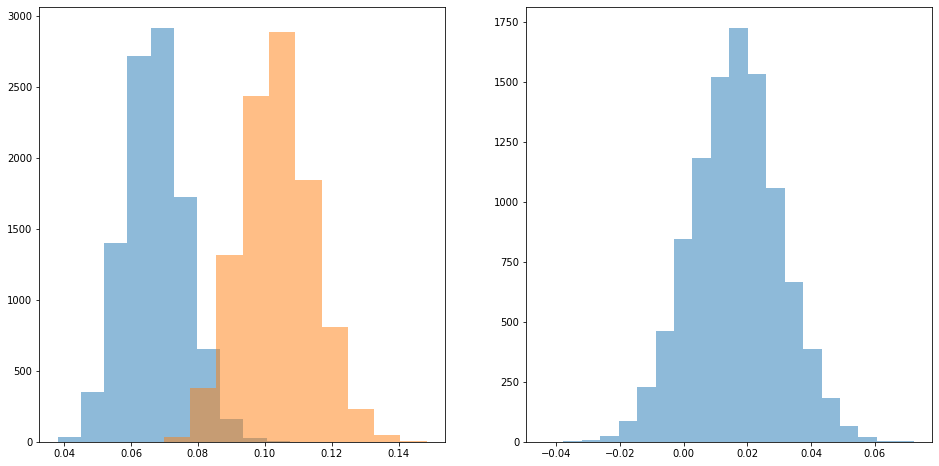

In [97]:
#A, B
fig, ax = plt.subplots(1,2, figsize = (16, 8))
ax[0].hist(A, alpha=0.5)
ax[0].hist(B, alpha=0.5)
C = B - A
D = B - A - 0.02

#ax[1].hist(C, alpha = 0.5)
ax[1].hist(D, alpha = 0.5, bins=20)

4. For a sanity check, see that you get similar results as you did in #8 using the frequentist approach. Which of the questions in #10 could you answer with a frequentist approach?

5. It's important to understand the business impact of your work as a data scientist. Imagine that your company is debating whether to switch to site B from site A. Assume the following:
    * the average click on site A yields $1.00 in profit
    * the average click on site B yields $1.05 in profit

    Should your company invest in switching to site B? Assume it is costly to do so, both in time and money. Explain. (**Hint**: The answer is not obvious.)